In [1]:
import pandas as pd
data_train = pd.read_csv('../../data/v2/train.csv')
data_train = data_train.loc[data_train['mtype'].str.contains("qm")]
data_test = pd.read_csv('../../data/v2/test.csv')
data_test = data_test.loc[data_test['mtype'].str.contains("qm")]

data_train = data_train.drop(columns=['year', 'competition', 'match', 'mtype', 'bscore', 'rscore', 'red_won'])
print(data_train.shape)

data_test = data_test.drop(columns=['year', 'competition', 'match', 'mtype', 'bscore', 'rscore', 'red_won'])
print(data_test.shape)

(48507, 15)
(8589, 15)


In [2]:
Y_train = data_train['blue_won'].values
print(Y_train.shape)
X_train = data_train.drop(columns=['blue_won'])
print(X_train.shape)

Y_test = data_test['blue_won'].values
print(Y_test.shape)
X_test = data_test.drop(columns=['blue_won'])
print(X_test.shape)

(48507,)
(48507, 14)
(8589,)
(8589, 14)


In [5]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=1)
from sklearn.model_selection import GridSearchCV

# Best found is acc 0.782 (+/-0.006) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50, 50), 'learning_rate': 'constant', 'solver': 'adam'}
# parameter_space = {
#     'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,), (50, 50, 50, 50)],
#     'activation': ['tanh', 'relu'],
#     'solver': ['sgd', 'adam', 'lbfgs'],
#     'alpha': [0.0001, 0.05],
#     'learning_rate': ['constant','adaptive'],
# }

clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train, Y_train)


/Users/federicogalbiati/miniforge3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/federicogalbiati/miniforge3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/federicogalbiati/miniforge3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/federicogalbiati/miniforge3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


GridSearchCV(cv=3, estimator=MLPClassifier(random_state=1), n_jobs=-1,
             param_grid={'activation': ['tanh'], 'alpha': [0.0001],
                         'hidden_layer_sizes': [(50, 50, 50, 50)],
                         'learning_rate': ['constant'], 'solver': ['adam']})

In [63]:
# Best paramete set
print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Best parameters found:
 {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50, 50), 'learning_rate': 'constant', 'solver': 'adam'}
0.771 (+/-0.001) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
0.775 (+/-0.002) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'adam'}
0.772 (+/-0.002) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'lbfgs'}
0.771 (+/-0.001) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.775 (+/-0.002) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.772 (+/-0.002) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'sol

In [65]:
y_pred = clf.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
print(accuracy_score(Y_test, y_pred))

cm = confusion_matrix(y_pred, Y_test)
print(cm)

0.7989288624985447
[[3529  849]
 [ 878 3333]]


In [4]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=1, hidden_layer_sizes=(50, 50, 50, 50), activation='tanh', solver='adam', alpha=0.0001, learning_rate='constant')
mlp.fit(X_train, Y_train)

/Users/federicogalbiati/miniforge3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='tanh', hidden_layer_sizes=(50, 50, 50, 50),
              random_state=1)

In [5]:
from joblib import dump
dump(mlp, 'WonLostMLPClassifier.joblib') 

['WonLostMLPClassifier.joblib']

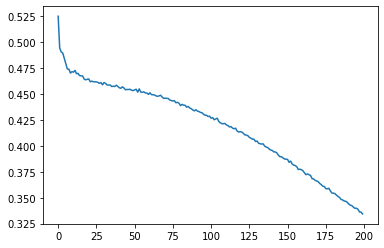

AttributeError: 'MLPClassifier' object has no attribute 'validation_scores_'

In [6]:
import matplotlib.pyplot as plt

plt.plot(mlp.loss_curve_)
plt.show()

plt.plot(mlp.validation_scores_)
plt.show()

In [7]:
y_pred = mlp.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
print(accuracy_score(Y_test, y_pred))

cm = confusion_matrix(y_pred, Y_test)
print(cm)

0.7989288624985447
[[3529  849]
 [ 878 3333]]
